# Google Sheets PLE Data Analysis
## Analyzing PLE Data from Google Sheets

This notebook provides tools to:
- Import data from Google Sheets
- Analyze PLE examination results
- Generate comprehensive visualizations
- Compare performance across years and districts

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import requests
from io import StringIO

# Configure display and plotting settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set professional color theme
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')  # Professional, colorblind-friendly palette
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['axes.edgecolor'] = '#dee2e6'
plt.rcParams['grid.color'] = '#dee2e6'
plt.rcParams['text.color'] = '#212529'
plt.rcParams['axes.labelcolor'] = '#212529'
plt.rcParams['xtick.color'] = '#495057'
plt.rcParams['ytick.color'] = '#495057'

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load Data from Google Sheets

### Method 1: Using Published CSV Link
1. In Google Sheets: File → Share → Publish to web
2. Choose the sheet/range and format as CSV
3. Copy the published link

### Method 2: Using Sheet ID and Export URL
Convert the Google Sheet URL to a CSV export URL

In [2]:
def load_from_google_sheet(sheet_url, sheet_name='Sheet1'):
    """
    Load data from Google Sheets
    
    Parameters:
    -----------
    sheet_url : str
        Google Sheets URL or Sheet ID
    sheet_name : str
        Name of the sheet tab (default: 'Sheet1')
    
    Returns:
    --------
    pd.DataFrame
        Loaded data
    """
    # Extract sheet ID from URL if full URL is provided
    if 'docs.google.com' in sheet_url:
        sheet_id = sheet_url.split('/d/')[1].split('/')[0]
    else:
        sheet_id = sheet_url
    
    # Construct export URL
    export_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    
    try:
        # Try to load the data
        df = pd.read_csv(export_url)
        print(f"✓ Successfully loaded data: {df.shape[0]} rows × {df.shape[1]} columns")
        return df
    except Exception as e:
        print(f"⚠ Error loading from Google Sheets: {e}")
        print("\nPlease ensure:")
        print("1. The Google Sheet is set to 'Anyone with the link can view'")
        print("2. The sheet name is correct")
        print("\nAlternatively, download the sheet as CSV and load it manually.")
        return None

# Your Google Sheet URL
GOOGLE_SHEET_URL = 'https://docs.google.com/spreadsheets/d/1X8Iwe1jbmkFZ1SHH6ayHx6YE11hamr6idJ68-L-KJF8/edit?usp=sharing'

# Try to load the data
google_data = load_from_google_sheet(GOOGLE_SHEET_URL)

if google_data is not None:
    print("\nFirst few rows:")
    display(google_data.head())
    print("\nColumn names:")
    print(google_data.columns.tolist())

✓ Successfully loaded data: 586 rows × 49 columns

First few rows:


,Year,Zone,Sub Region,District,Division 1 - Boys,Division 1 - Girls,Division 1 - Total,Division 2 - Boys,Division 2 - Girls,Division 2 - Total,Division 3 - Boys,Division 3 - Girls,Division 3 - Total,Division 4 - Boys,Division 4 - Girls,Division 4 - Total,Division U - Boys,Division U - Girls,Division U - Total,Division X - Boys,Division X - Girls,Division X - Total,Registered - Boys,Registered - Girls,Registered - Total,Sat - Boys,Sat - Girls,Sat - Total,Passed - Boys,Passed - Girls,Passed - Total,Pass Rate - Boys,Pass Rate - Girls,Pass Rate - Total,Pass Division 1_2_3 Boys,Pass Division 1_2_3 Girls,Pass Division 1_2_3 Total,Pass Rate Division 1_2_3 Boys,Pass Rate Division 1_2_3 Girls,Pass Rate Division 1_2_3 Total,Pass Rate Division 1 Boys,Pass Rate Division 1 Girls,Pass Rate Division 1 Total,Failure Rate - Boys,Failure Rate - Girls,Failure Rate - Total,Abseentism Rate - Boys,Abseentism Rate - Girls,Abseentism Rate - Total
0,2024,Other,South Buganda,Rakai,309,282,591,1534,2098,3632,276,425,701,94,143,237,46,75,121,57,65,122,2316,3088,5404,2259,3023,5282,2213,2948,5161,97.96%,97.52%,97.71%,2119,2805,4924,93.80%,92.79%,93.22%,13.68%,9.33%,11.19%,3.32%,2.48%,2.29%,2.46%,2.10%,2.26%
1,2024,Other,Kigezi,Rubanda,136,113,249,702,907,1609,330,602,932,134,182,316,89,189,278,24,52,76,1415,2045,3460,1391,1993,3384,1302,1804,3106,93.60%,90.52%,91.78%,1168,1622,2790,83.97%,81.38%,82.45%,9.78%,5.67%,7.36%,13.59%,9.48%,8.22%,1.70%,2.54%,2.20%
2,2024,Other,Ankole,Rubirizi,341,352,693,857,1019,1876,120,169,289,32,52,84,13,14,27,6,22,28,1369,1628,2997,1363,1606,2969,1350,1592,2942,99.05%,99.13%,99.09%,1318,1540,2858,96.70%,95.89%,96.26%,25.02%,21.92%,23.34%,1.03%,0.87%,0.91%,0.44%,1.35%,0.93%
3,2024,Other,Kigezi,Rukiga,130,89,219,581,701,1282,176,272,448,47,80,127,22,53,75,12,12,24,968,1207,2175,956,1195,2151,934,1142,2076,97.70%,95.56%,96.51%,887,1062,1949,92.78%,88.87%,90.61%,13.60%,7.45%,10.18%,5.54%,4.44%,3.49%,1.24%,0.99%,1.10%
4,2024,Other,Kigezi,Rukungiri,624,524,1148,1983,2344,4327,671,1039,1710,167,246,413,81,117,198,37,45,82,3563,4315,7878,3526,4270,7796,3445,4153,7598,97.70%,97.26%,97.46%,3278,3907,7185,92.97%,91.50%,92.16%,17.70%,12.27%,14.73%,3.32%,2.74%,2.54%,1.04%,1.04%,1.04%



Column names:
['Year', 'Zone', 'Sub Region', 'District', 'Division 1 - Boys', 'Division 1 - Girls', 'Division 1 - Total', 'Division 2 - Boys', 'Division 2 - Girls', 'Division 2 - Total', 'Division 3 - Boys', 'Division 3 - Girls', 'Division 3 - Total', 'Division 4 - Boys', 'Division 4 - Girls', 'Division 4 - Total', 'Division U - Boys', 'Division U - Girls', 'Division U - Total', 'Division X - Boys', 'Division X - Girls', 'Division X - Total', 'Registered - Boys', 'Registered - Girls', 'Registered - Total', 'Sat - Boys', 'Sat - Girls', 'Sat - Total', 'Passed - Boys', 'Passed - Girls', 'Passed - Total', 'Pass Rate - Boys', 'Pass Rate - Girls', 'Pass Rate - Total', 'Pass Division 1_2_3 Boys', 'Pass Division 1_2_3 Girls', 'Pass Division 1_2_3 Total', 'Pass Rate Division 1_2_3 Boys', 'Pass Rate Division 1_2_3 Girls', 'Pass Rate Division 1_2_3 Total', 'Pass Rate Division 1 Boys', 'Pass Rate Division 1 Girls', 'Pass Rate Division 1 Total', 'Failure Rate -  Boys', 'Failure Rate - Girls', 'Fai

## 3. Alternative: Load from Downloaded CSV

If the Google Sheet is private, download it as CSV and load it here.

In [3]:
# Uncomment and modify this if you downloaded the CSV file
# google_data = pd.read_csv('path/to/your/downloaded/file.csv')
# print(f"Loaded: {google_data.shape}")
# display(google_data.head())

## 4. Data Inspection and Cleaning

In [4]:
if google_data is not None:
    print("=" * 80)
    print("DATA OVERVIEW")
    print("=" * 80)
    
    print(f"\nShape: {google_data.shape}")
    print(f"\nColumns ({len(google_data.columns)}):")
    for i, col in enumerate(google_data.columns, 1):
        print(f"  {i}. {col}")
    
    print("\nData Types:")
    display(google_data.dtypes)
    
    print("\nMissing Values:")
    missing = google_data.isnull().sum()
    if missing.sum() > 0:
        display(missing[missing > 0])
    else:
        print("  No missing values!")
    
    print("\nBasic Statistics:")
    display(google_data.describe())

DATA OVERVIEW

Shape: (586, 49)

Columns (49):
  1. Year
  2. Zone
  3. Sub Region
  4. District
  5. Division 1 - Boys
  6. Division 1 - Girls
  7. Division 1 - Total
  8. Division 2 - Boys
  9. Division 2 - Girls
  10. Division 2 - Total
  11. Division 3 - Boys
  12. Division 3 - Girls
  13. Division 3 - Total
  14. Division 4 - Boys
  15. Division 4 - Girls
  16. Division 4 - Total
  17. Division U - Boys
  18. Division U - Girls
  19. Division U - Total
  20. Division X - Boys
  21. Division X - Girls
  22. Division X - Total
  23. Registered - Boys
  24. Registered - Girls
  25. Registered - Total
  26. Sat - Boys
  27. Sat - Girls
  28. Sat - Total
  29. Passed - Boys
  30. Passed - Girls
  31. Passed - Total
  32. Pass Rate - Boys
  33. Pass Rate - Girls
  34. Pass Rate - Total
  35. Pass Division 1_2_3 Boys
  36. Pass Division 1_2_3 Girls
  37. Pass Division 1_2_3 Total
  38. Pass Rate Division 1_2_3 Boys
  39. Pass Rate Division 1_2_3 Girls
  40. Pass Rate Division 1_2_3 Total

Year                               int64
Zone                              object
Sub Region                        object
District                          object
Division 1 - Boys                  int64
Division 1 - Girls                 int64
Division 1 - Total                 int64
Division 2 - Boys                  int64
Division 2 - Girls                 int64
Division 2 - Total                 int64
Division 3 - Boys                  int64
Division 3 - Girls                 int64
Division 3 - Total                 int64
Division 4 - Boys                  int64
Division 4 - Girls                 int64
Division 4 - Total                 int64
Division U - Boys                  int64
Division U - Girls                 int64
Division U - Total                 int64
Division X - Boys                  int64
Division X - Girls                 int64
Division X - Total                 int64
Registered - Boys                  int64
Registered - Girls                 int64
Registered - Tot


Missing Values:


Zone          178
Sub Region    103
dtype: int64


Basic Statistics:


,Year,Division 1 - Boys,Division 1 - Girls,Division 1 - Total,Division 2 - Boys,Division 2 - Girls,Division 2 - Total,Division 3 - Boys,Division 3 - Girls,Division 3 - Total,Division 4 - Boys,Division 4 - Girls,Division 4 - Total,Division U - Boys,Division U - Girls,Division U - Total,Division X - Boys,Division X - Girls,Division X - Total,Registered - Boys,Registered - Girls,Registered - Total,Sat - Boys,Sat - Girls,Sat - Total,Passed - Boys,Passed - Girls,Passed - Total,Pass Division 1_2_3 Boys,Pass Division 1_2_3 Girls,Pass Division 1_2_3 Total
count,586.000000,586.000000,586.000000,586.000000,586.00000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,2023.607509,342.919795,301.472696,644.392491,1222.74744,1304.136519,2526.883959,490.522184,590.972696,1081.494881,254.267918,302.419795,551.568259,250.593857,309.136519,559.745734,43.481229,49.030717,92.511945,2604.532423,2857.168942,5461.701365,2561.051195,2808.138225,5369.189420,2310.457338,2499.001706,4809.459044,2056.189420,2196.581911,4252.771331
std,1.145580,835.273556,794.886250,1628.731741,1517.89911,1857.157885,3368.389158,378.667371,499.574588,869.057808,204.880031,265.136213,447.942815,222.907567,259.933341,479.337918,48.345910,55.834393,103.125170,2934.086161,3429.565671,6352.179996,2894.204438,3382.538133,6265.383358,2766.306348,3244.644327,6000.602106,2611.114979,3032.108523,5634.909299
min,2022.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,89.000000,245.000000,112.000000,67.000000,194.000000,103.000000,63.000000,183.000000,95.000000,46.000000,153.000000
25%,2023.000000,56.250000,30.000000,88.250000,558.00000,448.000000,1040.750000,268.250000,304.250000,598.000000,114.250000,132.000000,252.000000,83.250000,105.000000,189.750000,14.000000,16.000000,30.000000,1339.000000,1293.500000,2600.500000,1317.250000,1279.750000,2557.000000,1131.500000,1090.500000,2206.500000,973.250000,893.250000,1857.500000
50%,2024.000000,148.000000,107.000000,254.000000,892.00000,859.500000,1773.500000,418.000000,477.500000,893.000000,216.500000,246.500000,471.000000,193.000000,252.000000,454.500000,30.000000,34.500000,64.000000,2107.000000,2188.000000,4310.000000,2047.500000,2148.500000,4207.000000,1792.000000,1834.500000,3564.500000,1522.500000,1538.000000,3102.500000
75%,2025.000000,340.750000,307.500000,642.500000,1467.75000,1580.000000,3030.000000,634.000000,762.750000,1429.750000,328.000000,394.500000,728.000000,356.000000,452.000000,822.500000,55.750000,63.000000,119.000000,3049.750000,3310.250000,6195.500000,3009.250000,3276.750000,6063.250000,2670.750000,2949.500000,5488.750000,2361.250000,2568.250000,4889.750000
max,2025.000000,10776.000000,10812.000000,21588.000000,19170.00000,22492.000000,41662.000000,3766.000000,5393.000000,9159.000000,1893.000000,2666.000000,4559.000000,1383.000000,1525.000000,2908.000000,461.000000,606.000000,1067.000000,34007.000000,38890.000000,72886.000000,33641.000000,38456.000000,72097.000000,32327.000000,37116.000000,69443.000000,30721.000000,35089.000000,65810.000000


## 5. Data Cleaning Function

In [5]:
def clean_ple_data(df):
    """
    Clean and prepare PLE data for analysis
    
    Parameters:
    -----------
    df : pd.DataFrame
        Raw PLE data
    
    Returns:
    --------
    pd.DataFrame
        Cleaned data with calculated metrics
    """
    df = df.copy()
    
    # Remove completely empty rows
    df = df.dropna(how='all')
    
    # Identify numeric columns (those with division data, registrations, etc.)
    numeric_patterns = ['Div', 'Division', 'Boys', 'Girls', 'Total', 'Registered', 'Pass', 'Rate']
    numeric_cols = [col for col in df.columns if any(pattern in col for pattern in numeric_patterns)]
    
    # Convert numeric columns
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    
    # Check if we have standard PLE columns
    has_divisions = any('Division' in col or 'Div' in col for col in df.columns)
    
    if has_divisions:
        # Calculate additional metrics if division data exists
        
        # Find division columns
        div_cols = [col for col in df.columns if 'Division' in col or 'Div' in col]
        
        # Try to calculate pass rate if not present
        if 'Pass_Rate' not in df.columns and 'Pass Rate' not in df.columns:
            # Look for passed and total columns
            if 'Registered - Total' in df.columns or 'Total' in df.columns:
                print("Calculating metrics...")
    
    print(f"✓ Data cleaned: {df.shape}")
    return df

if google_data is not None:
    clean_data = clean_ple_data(google_data)
    display(clean_data.head())

Calculating metrics...
✓ Data cleaned: (586, 49)


,Year,Zone,Sub Region,District,Division 1 - Boys,Division 1 - Girls,Division 1 - Total,Division 2 - Boys,Division 2 - Girls,Division 2 - Total,Division 3 - Boys,Division 3 - Girls,Division 3 - Total,Division 4 - Boys,Division 4 - Girls,Division 4 - Total,Division U - Boys,Division U - Girls,Division U - Total,Division X - Boys,Division X - Girls,Division X - Total,Registered - Boys,Registered - Girls,Registered - Total,Sat - Boys,Sat - Girls,Sat - Total,Passed - Boys,Passed - Girls,Passed - Total,Pass Rate - Boys,Pass Rate - Girls,Pass Rate - Total,Pass Division 1_2_3 Boys,Pass Division 1_2_3 Girls,Pass Division 1_2_3 Total,Pass Rate Division 1_2_3 Boys,Pass Rate Division 1_2_3 Girls,Pass Rate Division 1_2_3 Total,Pass Rate Division 1 Boys,Pass Rate Division 1 Girls,Pass Rate Division 1 Total,Failure Rate - Boys,Failure Rate - Girls,Failure Rate - Total,Abseentism Rate - Boys,Abseentism Rate - Girls,Abseentism Rate - Total
0,2024,Other,South Buganda,Rakai,309,282,591,1534,2098,3632,276,425,701,94,143,237,46,75,121,57,65,122,2316,3088,5404,2259,3023,5282,2213,2948,5161,0.0,0.0,0.0,2119,2805,4924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,Other,Kigezi,Rubanda,136,113,249,702,907,1609,330,602,932,134,182,316,89,189,278,24,52,76,1415,2045,3460,1391,1993,3384,1302,1804,3106,0.0,0.0,0.0,1168,1622,2790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,Other,Ankole,Rubirizi,341,352,693,857,1019,1876,120,169,289,32,52,84,13,14,27,6,22,28,1369,1628,2997,1363,1606,2969,1350,1592,2942,0.0,0.0,0.0,1318,1540,2858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,Other,Kigezi,Rukiga,130,89,219,581,701,1282,176,272,448,47,80,127,22,53,75,12,12,24,968,1207,2175,956,1195,2151,934,1142,2076,0.0,0.0,0.0,887,1062,1949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,Other,Kigezi,Rukungiri,624,524,1148,1983,2344,4327,671,1039,1710,167,246,413,81,117,198,37,45,82,3563,4315,7878,3526,4270,7796,3445,4153,7598,0.0,0.0,0.0,3278,3907,7185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. Exploratory Data Analysis

In [6]:
if google_data is not None:
    # Identify key columns for analysis
    numeric_cols = clean_data.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) > 0:
        print("=" * 80)
        print("SUMMARY STATISTICS")
        print("=" * 80)
        
        # Select top numeric columns for display
        display_cols = numeric_cols[:10] if len(numeric_cols) > 10 else numeric_cols
        display(clean_data[display_cols].describe())
        
        # Check for year/district columns
        year_col = next((col for col in clean_data.columns if 'year' in col.lower()), None)
        district_col = next((col for col in clean_data.columns if 'district' in col.lower() or 'area' in col.lower()), None)
        
        if year_col:
            print(f"\nYears in dataset: {sorted(clean_data[year_col].dropna().unique())}")
        
        if district_col:
            print(f"\nNumber of districts: {clean_data[district_col].nunique()}")
            print(f"Sample districts: {list(clean_data[district_col].dropna().unique()[:10])}")

SUMMARY STATISTICS


,Year,Division 1 - Boys,Division 1 - Girls,Division 1 - Total,Division 2 - Boys,Division 2 - Girls,Division 2 - Total,Division 3 - Boys,Division 3 - Girls,Division 3 - Total
count,586.000000,586.000000,586.000000,586.000000,586.00000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,2023.607509,342.919795,301.472696,644.392491,1222.74744,1304.136519,2526.883959,490.522184,590.972696,1081.494881
std,1.145580,835.273556,794.886250,1628.731741,1517.89911,1857.157885,3368.389158,378.667371,499.574588,869.057808
min,2022.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2.000000,7.000000
25%,2023.000000,56.250000,30.000000,88.250000,558.00000,448.000000,1040.750000,268.250000,304.250000,598.000000
50%,2024.000000,148.000000,107.000000,254.000000,892.00000,859.500000,1773.500000,418.000000,477.500000,893.000000
75%,2025.000000,340.750000,307.500000,642.500000,1467.75000,1580.000000,3030.000000,634.000000,762.750000,1429.750000
max,2025.000000,10776.000000,10812.000000,21588.000000,19170.00000,22492.000000,41662.000000,3766.000000,5393.000000,9159.000000



Years in dataset: [2022, 2023, 2024, 2025]

Number of districts: 314
Sample districts: ['Rakai', 'Rubanda', 'Rubirizi', 'Rukiga', 'Rukungiri', 'Rwampara', 'Serere', 'Sheema', 'Sironko', 'Soroti']


## 7. Basic Visualizations

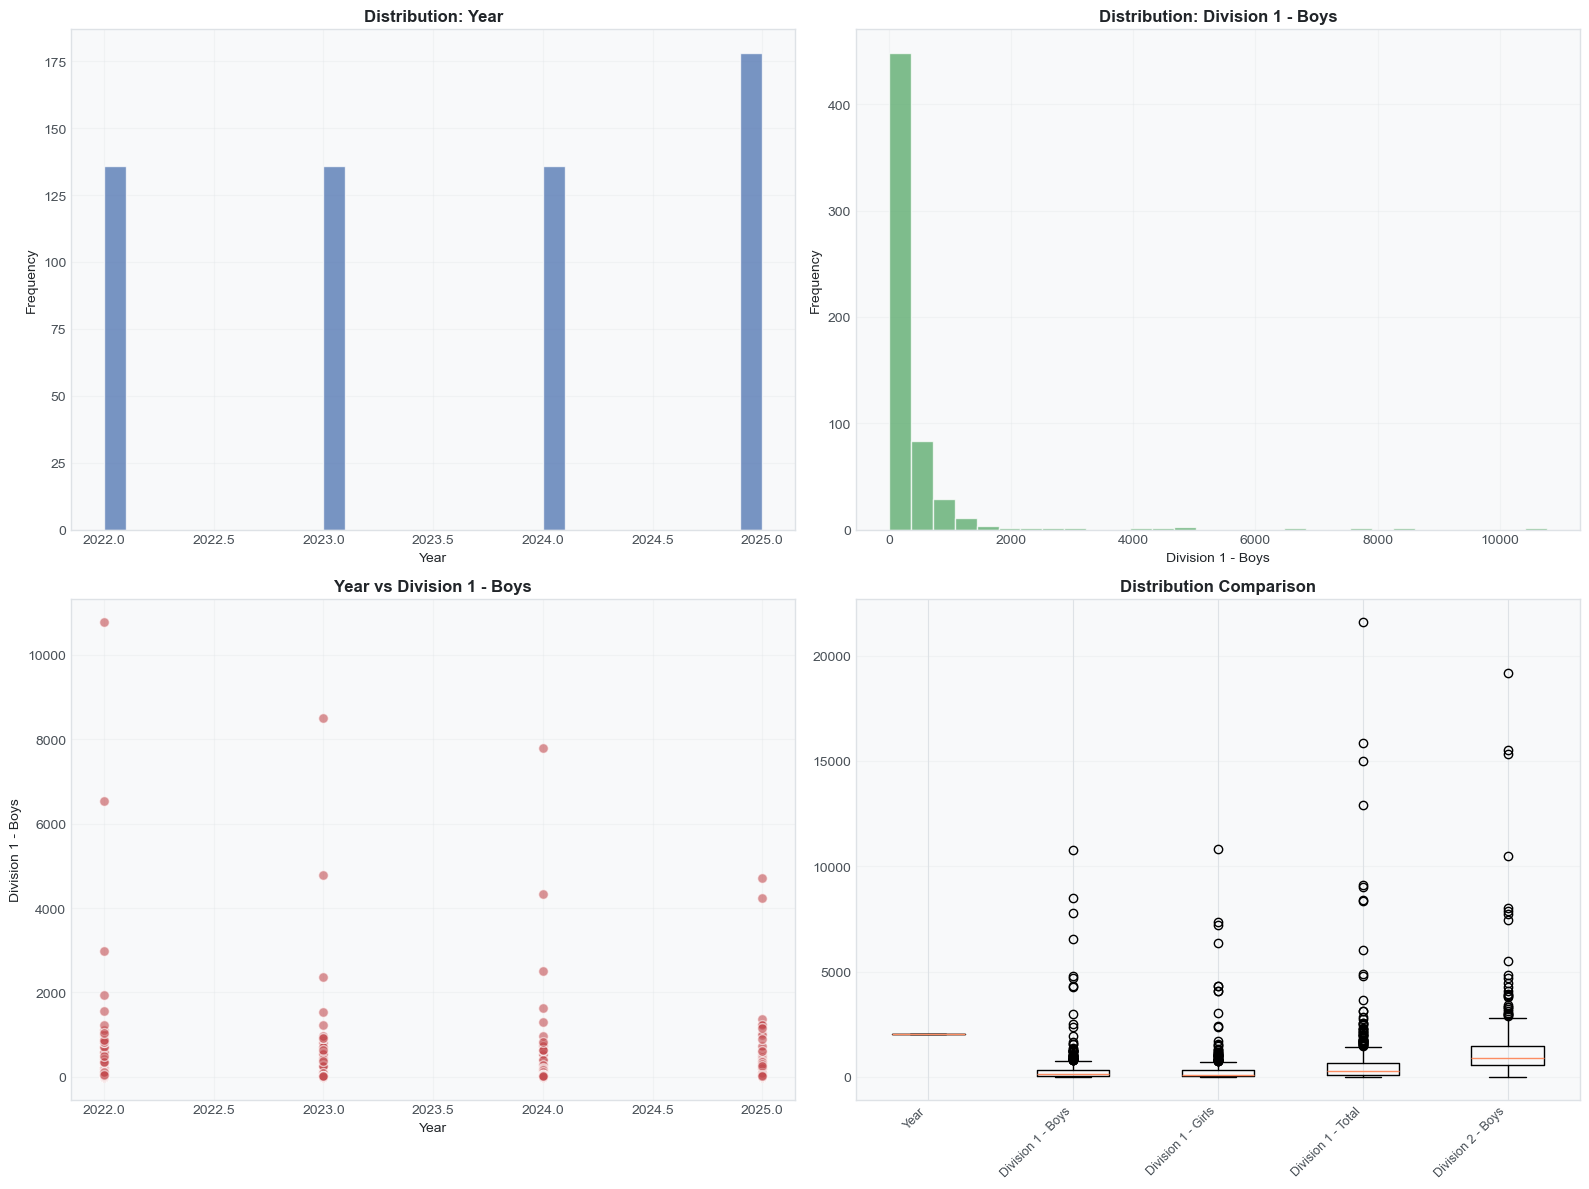

In [7]:
if google_data is not None and len(numeric_cols) > 0:
    # Create visualizations based on available data
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Distribution of first numeric column
    if len(numeric_cols) >= 1:
        col1 = numeric_cols[0]
        axes[0, 0].hist(clean_data[col1].dropna(), bins=30, color='#4C72B0', alpha=0.75, edgecolor='white')
        axes[0, 0].set_title(f'Distribution: {col1}', fontsize=12, fontweight='bold')
        axes[0, 0].set_xlabel(col1)
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Distribution of second numeric column
    if len(numeric_cols) >= 2:
        col2 = numeric_cols[1]
        axes[0, 1].hist(clean_data[col2].dropna(), bins=30, color='#55A868', alpha=0.75, edgecolor='white')
        axes[0, 1].set_title(f'Distribution: {col2}', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel(col2)
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Scatter plot if we have at least 2 numeric columns
    if len(numeric_cols) >= 2:
        axes[1, 0].scatter(clean_data[numeric_cols[0]], clean_data[numeric_cols[1]], 
                          alpha=0.6, s=50, color='#C44E52', edgecolors='white')
        axes[1, 0].set_title(f'{numeric_cols[0]} vs {numeric_cols[1]}', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel(numeric_cols[0])
        axes[1, 0].set_ylabel(numeric_cols[1])
        axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Box plot of numeric columns
    if len(numeric_cols) >= 3:
        data_to_plot = [clean_data[col].dropna() for col in numeric_cols[:5]]
        axes[1, 1].boxplot(data_to_plot, labels=numeric_cols[:5])
        axes[1, 1].set_title('Distribution Comparison', fontsize=12, fontweight='bold')
        axes[1, 1].set_xticklabels(numeric_cols[:5], rotation=45, ha='right', fontsize=9)
        axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

## 8. Advanced Analysis (Based on Data Structure)

In [8]:
# This cell will perform advanced analysis once we understand the data structure
if google_data is not None:
    print("=" * 80)
    print("CUSTOM ANALYSIS")
    print("=" * 80)
    print("\nBased on your data structure, you can add custom analysis here.")
    print("\nSuggested analyses:")
    print("- Yearly trends")
    print("- District comparisons")
    print("- Performance rankings")
    print("- Gender analysis")
    print("- Division distributions")
    
    # Example: If data has year column
    year_col = next((col for col in clean_data.columns if 'year' in col.lower()), None)
    if year_col:
        print(f"\n✓ Year column found: '{year_col}'")
        yearly_summary = clean_data.groupby(year_col)[numeric_cols].sum()
        print("\nYearly Summary:")
        display(yearly_summary)

CUSTOM ANALYSIS

Based on your data structure, you can add custom analysis here.

Suggested analyses:
- Yearly trends
- District comparisons
- Performance rankings
- Gender analysis
- Division distributions

✓ Year column found: 'Year'

Yearly Summary:


,Year,Division 1 - Boys,Division 1 - Girls,Division 1 - Total,Division 2 - Boys,Division 2 - Girls,Division 2 - Total,Division 3 - Boys,Division 3 - Girls,Division 3 - Total,Division 4 - Boys,Division 4 - Girls,Division 4 - Total,Division U - Boys,Division U - Girls,Division U - Total,Division X - Boys,Division X - Girls,Division X - Total,Registered - Boys,Registered - Girls,Registered - Total,Sat - Boys,Sat - Girls,Sat - Total,Passed - Boys,Passed - Girls,Passed - Total,Pass Rate - Boys,Pass Rate - Girls,Pass Rate - Total,Pass Division 1_2_3 Boys,Pass Division 1_2_3 Girls,Pass Division 1_2_3 Total,Pass Rate Division 1_2_3 Boys,Pass Rate Division 1_2_3 Girls,Pass Rate Division 1_2_3 Total,Pass Rate Division 1 Boys,Pass Rate Division 1 Girls,Pass Rate Division 1 Total,Failure Rate - Boys,Failure Rate - Girls,Failure Rate - Total,Abseentism Rate - Boys,Abseentism Rate - Girls,Abseentism Rate - Total
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022,274992,60070,54547,114617,172827,184972,357799,68272,78311,146583,43794,51908,95702,45309,51800,97109,9833,11020,20853,400105,432558,832663,390272,421538,811810,344963,369738,714701,0.0,0.0,0.0,301169,317830,618999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023,275128,47452,39130,86582,164906,171601,336507,69870,86420,156290,31415,37868,66283,38346,49923,88269,5766,6557,12323,357755,391499,749254,351989,384942,736931,313643,335019,648662,0.0,0.0,0.0,282228,297151,579379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024,275264,45203,39098,84301,192546,205043,397589,71951,93333,165284,36049,39507,75556,28110,36141,64251,4842,5621,10463,378701,418743,797444,373859,413122,786981,345749,376981,722730,0.0,0.0,0.0,309700,337474,647174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025,360450,48226,43888,92114,186251,202608,388859,77353,88246,165599,37743,47935,85678,35083,43290,78382,5039,5534,10573,389695,431501,821196,384656,425967,810623,349573,382677,732250,0.0,0.0,0.0,311830,334742,646572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 9. Export Results

In [9]:
if google_data is not None:
    # Save cleaned data
    output_file = 'data/google_sheet_cleaned.csv'
    clean_data.to_csv(output_file, index=False)
    print(f"✓ Cleaned data saved to: {output_file}")

✓ Cleaned data saved to: data/google_sheet_cleaned.csv


## Instructions for Next Steps

### If the Google Sheet is Private:
1. Open the Google Sheet
2. Click File → Share → Change to "Anyone with the link can view"
3. Re-run cell 2 to load the data

### Alternative Method:
1. Download the Google Sheet as CSV (File → Download → CSV)
2. Place it in the `data/` folder
3. Update cell 3 with the file path
4. Run the analysis

### Once Data is Loaded:
I can help you create custom analyses based on the specific structure of your data!